In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

# matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['legend.fontsize'] = 10
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.3
plt.rcParams['font.family'] = 'Fira Code'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

In [2]:
#open the results so far
path = "/home/raulwolters/Documents/school/MRP1-HI_Cavity_Distribution/tmp/"
gauß = np.genfromtxt(path + "gauß_ws.csv", delimiter=',', dtype=int)
unif = np.genfromtxt(path + "unif_ws.csv", delimiter=',', dtype=int)
real = np.genfromtxt(path + "real_ws.csv", delimiter=',', dtype=int)
all = [(gauß, "Gaußian $P\sim k^{-3}$"), (unif, "Uniform"), (real, "Data")]

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


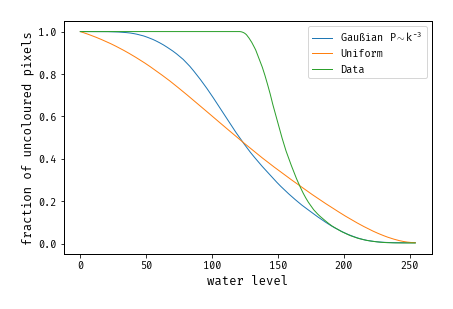

In [3]:
#plot percentage of uncoloured pixels (first column)
for (field, name) in all:
  uncoloured = field[:,0]
  max = np.max(uncoloured)
  uncoloured = uncoloured / max #normalize
  plt.plot(uncoloured, label=name)
  plt.xlabel("water level")
  plt.ylabel("fraction of uncoloured pixels")
  plt.legend()

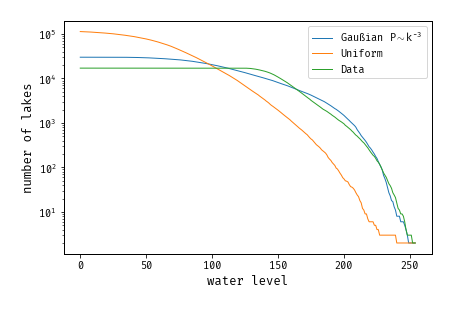

In [4]:
#number of lakes vs. water level
for (field, name) in all:
  lake_count = [len(lakes[np.where(lakes != 0)]) for lakes in field]
  plt.plot(lake_count, label=name)
plt.xlabel("water level")
plt.ylabel("number of lakes")
plt.legend()
plt.yscale('log')

<Figure size 432x288 with 0 Axes>

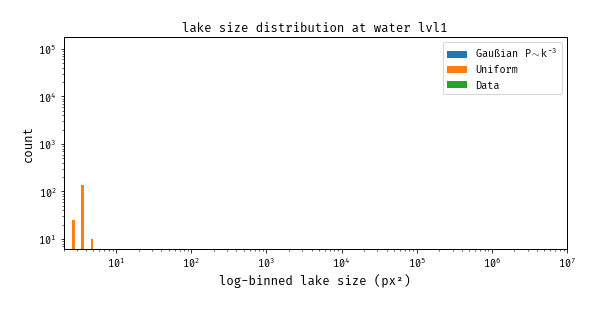

<Figure size 432x288 with 0 Axes>

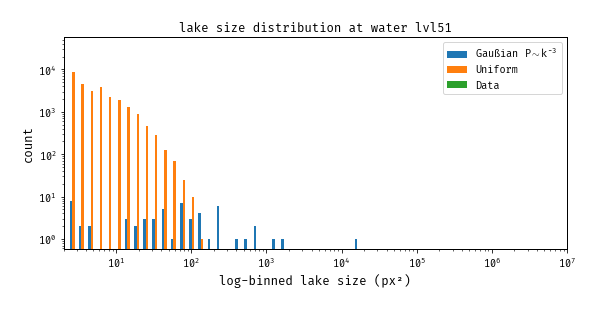

<Figure size 432x288 with 0 Axes>

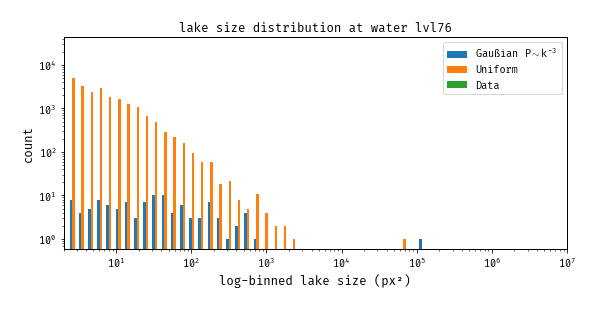

<Figure size 432x288 with 0 Axes>

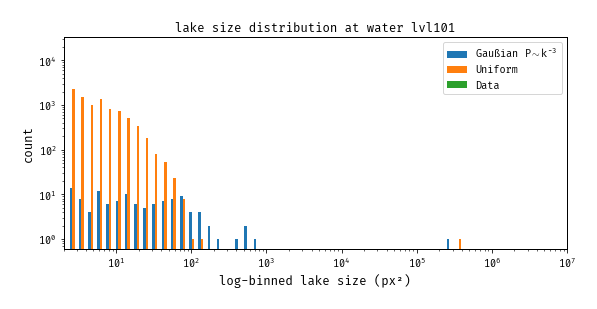

<Figure size 432x288 with 0 Axes>

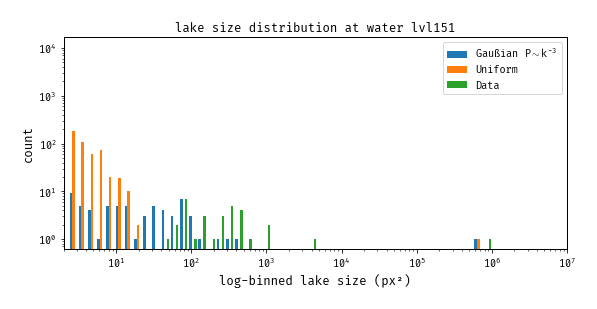

In [8]:
def make_level_hist(water_level: int):
  bins = np.logspace(0, 6)
  plt.figure()
  
  #collect the histograms
  hists = []
  labels = []
    
  for (field, name) in all:
    #we skip the first entry of the water lvl cuz it is the number of uncoloured px
    hists.append(field[water_level,1:])
    labels.append(name)
  
  plt.figure(figsize=(8,4))
  plt.hist(hists, bins=bins, label=labels)
  plt.legend()
  plt.xlim(2, 10e6)
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel("log-binned lake size (px²)")
  plt.ylabel("count")
  plt.title(f"lake size distribution at water lvl{water_level+1}")

make_level_hist(0)
make_level_hist(50)
make_level_hist(75)
make_level_hist(100)
make_level_hist(150)

[ 1.92359101 -1.51075021]


(0.9, 100)

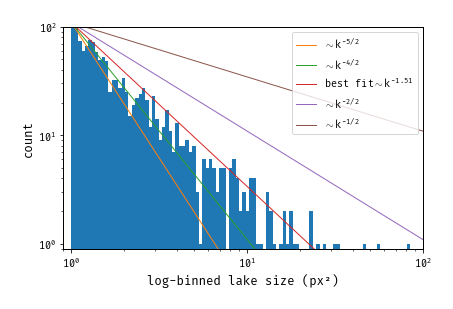

In [6]:
#prepare histogram averaged over full water-level range
margin = np.average(gauß[:,1:], axis=0)
bins = np.logspace(0, np.log10(np.max(margin)),300)
hist, bin_edges = np.histogram(margin, bins)
plt.hist(margin, bins=bins)

#best fitting power-law
nonzero = np.where(bin_edges < 10)
pop, _ = curve_fit(lambda x, a, b: a + b*x, np.log10(bin_edges[nonzero]), np.log10(hist[nonzero] + 1), [100, -1])
print(pop)

amplitude = np.max(hist)
plt.plot(bin_edges, amplitude*bin_edges**-2.5, label="$\sim k^{-5/2}$")
plt.plot(bin_edges, amplitude*bin_edges**-2, label="$\sim k^{-4/2}$")
plt.plot(bin_edges, amplitude*bin_edges**pop[1], label=f"best fit$\sim k^{{{np.round(pop[1], 2)}}}$")
plt.plot(bin_edges, amplitude*bin_edges**-1, label="$\sim k^{-2/2}$")
plt.plot(bin_edges, amplitude*bin_edges**-0.5, label="$\sim k^{-1/2}$")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log-binned lake size (px²)")
plt.ylabel("count")
plt.legend()
plt.ylim(0.9, 1e2)
plt.xlim(0.9, 100)

[ 1.92359101 -1.51075021]


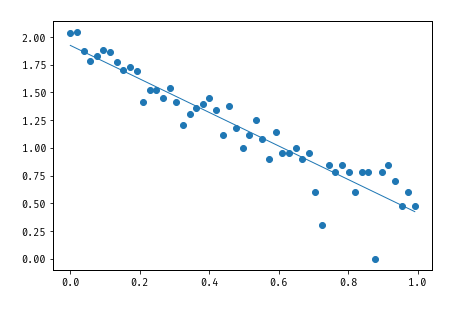

In [7]:
nonzero = np.where(bin_edges < 10)
pop, _ = curve_fit(lambda x, a, b: a + b*x, np.log10(bin_edges[nonzero]), np.log10(hist[nonzero] + 1), [100, -1])
print(pop)

plt.figure()
plt.scatter(np.log10(bin_edges[nonzero]), np.log10(hist[nonzero] + 1))
plt.plot(np.log10(bin_edges[nonzero]), pop[0] + np.log10(bin_edges[nonzero])*pop[1])